<a href="https://colab.research.google.com/github/kmayachary/Data-Science/blob/main/MNIST_with_1K_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%pwd

'/content'

In [ ]:
%cd /content/sample_data/

/content/sample_data


In [ ]:
df = pd.read_csv('mnist_train_small.csv')

In [ ]:
df.shape

(19999, 785)

In [ ]:
df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
d = df.drop('6', axis = 1)

In [ ]:
l = df['6']

In [ ]:
d.shape

(19999, 784)

In [ ]:
l.shape

(19999,)

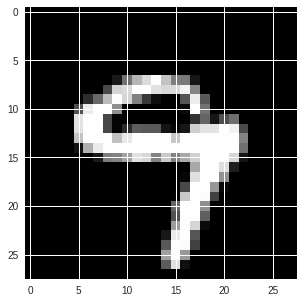

In [ ]:
plt.figure(figsize=(5,5))
idx = 2
grid_data = d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data, interpolation = 'none', cmap='gray')
plt.show()

In [ ]:
labels = l
data = d
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
standardized_data.shape

(19999, 784)

In [ ]:
sample_data = standardized_data
covar_matrix = np.matmul(sample_data.T, sample_data)
covar_matrix.shape

(784, 784)

In [ ]:
from scipy.linalg import eigh
values, vectors = eigh(covar_matrix, eigvals=(782,783))
print(vectors.shape)
vectors = vectors.T
vectors.shape

(784, 2)


(2, 784)

In [ ]:
new_coordinates = np.matmul(vectors, sample_data.T)

print(vectors.shape, 'X', sample_data.T.shape, '=', new_coordinates.shape)

(2, 784) X (784, 19999) = (2, 19999)


In [ ]:
new_coordinates = np.vstack((new_coordinates, labels)).T
dataframe = pd.DataFrame(data = new_coordinates, columns = ('1st_principal', '2nd_principal', 'labels'))
dataframe.head()

,1st_principal,2nd_principal,labels
0,1.138147,2.003807,5.0
1,-1.708718,3.722222,7.0
2,9.446533,2.713279,9.0
3,4.499235,3.885012,5.0
4,-6.639764,4.080923,2.0


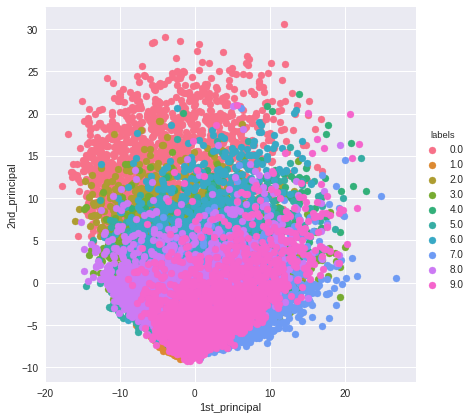

In [ ]:
sns.FacetGrid(dataframe, hue = 'labels', size = 6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
pca_data.shape

(19999, 2)

In [ ]:
sample_data.shape

(19999, 784)

In [ ]:
pca_data = pca_data.T

In [ ]:
pca_data.shape

(2, 19999)

In [ ]:
pca_data = np.vstack((pca_data, labels)).T

In [ ]:
pca_df = pd.DataFrame(data= pca_data, columns = ('1st_principal', '2nd_principal', 'labels'))

In [ ]:
pca_df.head()

,1st_principal,2nd_principal,labels
0,2.003771,1.137909,5.0
1,3.722312,-1.708739,7.0
2,2.713221,9.446429,9.0
3,3.884963,4.498934,5.0
4,4.080957,-6.639540,2.0


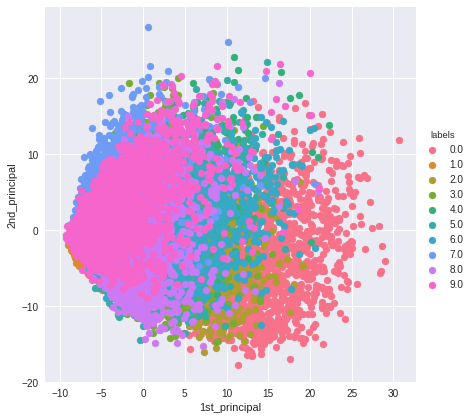

In [ ]:
sns.FacetGrid(pca_df, hue = 'labels', size = 6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

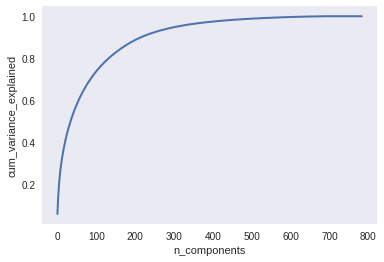

In [ ]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)
percentage_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)
plt.figure(1, figsize = (6,4))
plt.clf()
plt.plot(cum_var_explained, linewidth = 2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cum_variance_explained')
plt.show()

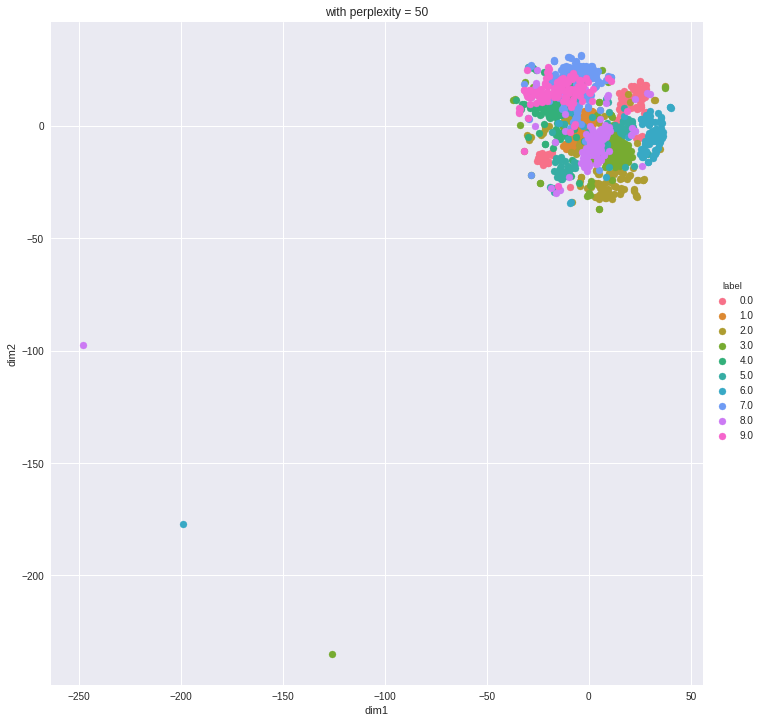

In [ ]:
from sklearn.manifold import TSNE
data = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]
model = TSNE(n_components = 2, random_state = 0, perplexity = 50, n_iter = 5000)
tsne_data = model.fit_transform(data)
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data, columns = ('dim1', 'dim2', 'label'))

sns.FacetGrid(tsne_df, hue = 'label', size = 10).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title('with perplexity = 50')
plt.show()




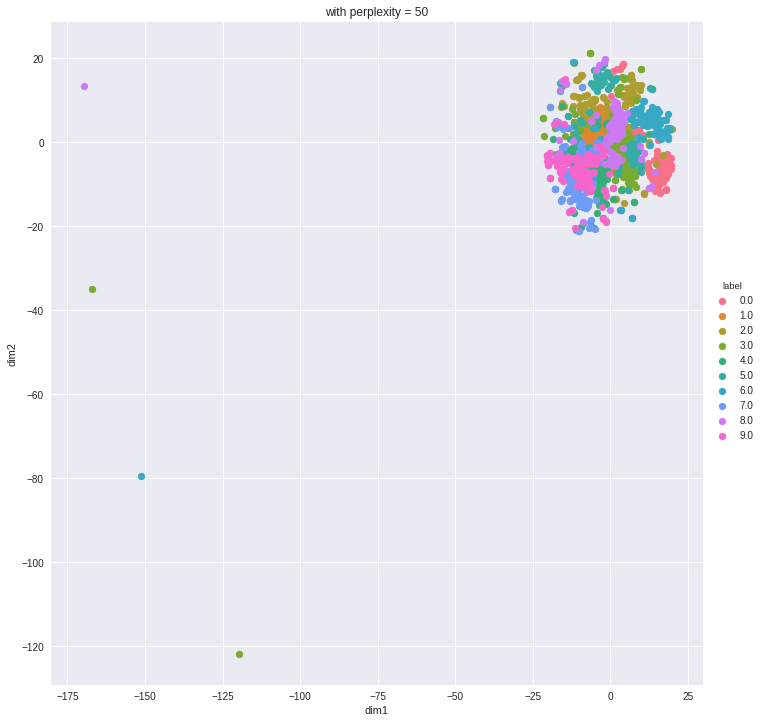

In [ ]:
from sklearn.manifold import TSNE
data = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]
model = TSNE(n_components = 2, random_state = 0, perplexity = 100, n_iter = 5000)
tsne_data = model.fit_transform(data)
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data, columns = ('dim1', 'dim2', 'label'))

sns.FacetGrid(tsne_df, hue = 'label', size = 10).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title('with perplexity = 50')
plt.show()


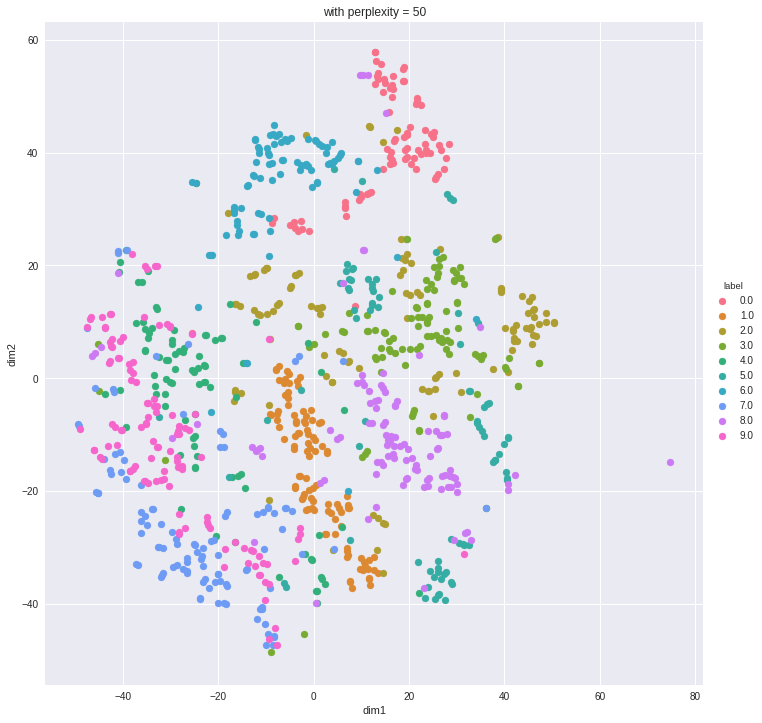

In [ ]:
from sklearn.manifold import TSNE
data = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]
model = TSNE(n_components = 2, random_state = 0, perplexity = 10, n_iter = 500)
tsne_data = model.fit_transform(data)
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data, columns = ('dim1', 'dim2', 'label'))

sns.FacetGrid(tsne_df, hue = 'label', size = 10).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title('with perplexity = 50')
plt.show()
